### Hello! Let's investigate these datasets! First, we'll import the needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import glob

#### Buoys

Then, let's collect the data from the buoys and take a first look at it

In [2]:
path = 'datasets\\buoys'
buoys = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
buoys.head()

C:\Users\lu-lu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0,1,4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,longitude,latitude,time,station_id,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeight,Hmax,SeaTemperature,MeanCurSpeed,MeanCurDirTo
0,degrees_east,degrees_north,UTC,NaN,s,degrees_true,s,cm,cm,degree_C,m/s,degrees_true
1,-9.911498,53.801353,2021-10-30T00:03:00Z,Clew Bay,11.11,281.3,4.651,85.0,NaN,13.3,NaN,NaN
2,-9.911498,53.801353,2021-10-30T00:33:00Z,Clew Bay,10.53,272.8,4.878,86.0,NaN,13.3,NaN,NaN
3,-9.911498,53.801353,2021-10-30T01:03:00Z,Clew Bay,11.11,308.0,4.938,84.0,NaN,13.25,NaN,NaN
4,-9.911498,53.801353,2021-10-30T01:33:00Z,Clew Bay,10.53,281.3,4.598,80.0,NaN,13.25,NaN,NaN


In [3]:
buoys.shape

(335955, 12)

In [4]:
buoys.dtypes

longitude                object
latitude                 object
time                     object
station_id               object
PeakPeriod               object
PeakDirection            object
UpcrossPeriod            object
SignificantWaveHeight    object
Hmax                     object
SeaTemperature           object
MeanCurSpeed             object
MeanCurDirTo             object
dtype: object

We see here that we have a lot of data from the buoys and that all the features came as objects. We need some of them as numbers so we can analyse them!
So I created the below function for that purpose: it gets all the columns, except the ones that need to remain as strings: the timestamp and the station name. All of the other ones will be cast as a numerical type.

In [5]:
def type_casting(df):
  col = df.columns
  col = col.drop(['time', 'station_id'])
  df1 = df[col].astype(float)
  df1[['time', 'station_id']] = df[['time', 'station_id']]
  return df1

I'll also eliminate the second row, since it has only the units in which the features are measured

In [6]:
buoys.drop(0, axis = 0, inplace = True)
buoys.head()

,longitude,latitude,time,station_id,PeakPeriod,PeakDirection,UpcrossPeriod,SignificantWaveHeight,Hmax,SeaTemperature,MeanCurSpeed,MeanCurDirTo
1,-9.911498,53.801353,2021-10-30T00:03:00Z,Clew Bay,11.11,281.3,4.651,85.0,NaN,13.3,NaN,NaN
2,-9.911498,53.801353,2021-10-30T00:33:00Z,Clew Bay,10.53,272.8,4.878,86.0,NaN,13.3,NaN,NaN
3,-9.911498,53.801353,2021-10-30T01:03:00Z,Clew Bay,11.11,308.0,4.938,84.0,NaN,13.25,NaN,NaN
4,-9.911498,53.801353,2021-10-30T01:33:00Z,Clew Bay,10.53,281.3,4.598,80.0,NaN,13.25,NaN,NaN
5,-9.911498,53.801353,2021-10-30T02:03:00Z,Clew Bay,11.76,285.5,4.878,74.0,NaN,13.2,NaN,NaN


Here we check for null values, eliminating the features with many such values we won't need, and eliminating the rows with null values that are left.

In [7]:
buoys.isna().sum()

longitude                     0
latitude                      0
time                          0
station_id                    0
PeakPeriod               229062
PeakDirection            229062
UpcrossPeriod            229062
SignificantWaveHeight    229062
Hmax                     290200
SeaTemperature                0
MeanCurSpeed             283050
MeanCurDirTo             283053
dtype: int64

In [8]:
buoys.drop(['MeanCurSpeed', 'MeanCurDirTo', 'PeakDirection', 'UpcrossPeriod'], axis = 1, inplace=True)
buoys.dropna(inplace=True)

In [9]:
buoys = type_casting(buoys) ## casting some features as numerical

First, we will need the names of the stations

In [10]:
stations = buoys['station_id'].value_counts().index
stations

Index(['Bantry Bay', 'Brandon Bay', 'SmartBay Wave Buoy', 'Clew Bay'], dtype='object')

Then, Let's build a function that gets the lowest temperature for each of the buoys and says when it happened

In [11]:
def min_temp(station):
  minimo = min(buoys[buoys['station_id'] == station]['SeaTemperature']) ## Here we get the lowest temperature for the buoy
  mes = buoys[(buoys['SeaTemperature'] == minimo) & (buoys['station_id'] == station)]['time'] ## then we get all the times this temperature happened
  date = []
  for m in mes:  ## We get there the specific month when it happened
    date.append(datetime.datetime.strptime(m, "%Y-%m-%dT%H:%M:%SZ"))
  month = pd.DataFrame([x.strftime("%B") for x in date]).value_counts().index[0][0]  ## and here we select the month where the lowest temperature usually occurs
  print ("The lowest temperature for " + str(station) + " is " + str(minimo) + " and it occurs in " + str(month))
  return minimo, month, station

Let's test this function!

In [12]:
minima, months, station_ids = [], [], []
for i in stations:
    minimum, month, station = min_temp(i)
    minima.append(minimum)
    months.append(month)
    station_ids.append(station)

The lowest temperature for Bantry Bay is 5.82 and it occurs in March
The lowest temperature for Brandon Bay is 6.28 and it occurs in March
The lowest temperature for SmartBay Wave Buoy is 5.48 and it occurs in March
The lowest temperature for Clew Bay is 14.75 and it occurs in June


It seems that for most of the buoys, the lowest temperature occurs in march. But let's try to get this information visually

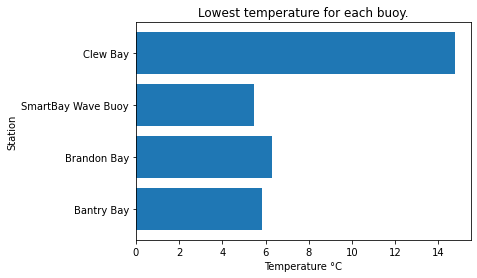

In [13]:
fig, ax = plt.subplots()
ax.barh(station_ids, minima)
ax.set_xlabel('Temperature °C')
ax.set_ylabel('Station')
ax.set_title('Lowest temperature for each buoy.')
plt.show()

We now know that SmartBay Wave Buoy is the coldest one!

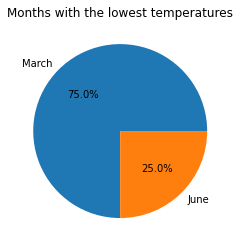

In [14]:
mon = pd.DataFrame(months)
vc = mon.value_counts()
fig, ax = plt.subplots()
ax.pie(vc[0:], labels = mon[0].value_counts().index, autopct='%1.1f%%',)
ax.set_title('Months with the lowest temperatures')
plt.show()

We can see that the coldest month is march!

#### Tides

Now let's look at the tides data

In [15]:
path = 'datasets\\tides'
tides = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))
tides.head()

,time,station_id,latitude,longitude,Water_Level_LAT,Water_Level_OD_Malin,QC_Flag
0,UTC,NaN,degrees_north,degrees_east,metres,metres,NaN
1,2021-08-19T17:20:00Z,Wexford Harbour,52.3385,-6.4589,1.251,0.295,1.0
2,2021-08-19T17:25:00Z,Wexford Harbour,52.3385,-6.4589,1.243,0.287,1.0
3,2021-08-19T17:30:00Z,Wexford Harbour,52.3385,-6.4589,1.219,0.263,1.0
4,2021-08-19T17:35:00Z,Wexford Harbour,52.3385,-6.4589,1.208,0.252,1.0


In [16]:
tides.shape

(1364748, 7)

We have a very large dataset! 

In [17]:
tides.dtypes

time                     object
station_id               object
latitude                 object
longitude                object
Water_Level_LAT          object
Water_Level_OD_Malin     object
QC_Flag                 float64
dtype: object

Let's eliminate the first row, which contains only information about the units, and all the null values

In [18]:
tides.drop(0, axis = 0, inplace = True)
tides.dropna(inplace=True)
tides.head()

,time,station_id,latitude,longitude,Water_Level_LAT,Water_Level_OD_Malin,QC_Flag
1,2021-08-19T17:20:00Z,Wexford Harbour,52.3385,-6.4589,1.251,0.295,1.0
2,2021-08-19T17:25:00Z,Wexford Harbour,52.3385,-6.4589,1.243,0.287,1.0
3,2021-08-19T17:30:00Z,Wexford Harbour,52.3385,-6.4589,1.219,0.263,1.0
4,2021-08-19T17:35:00Z,Wexford Harbour,52.3385,-6.4589,1.208,0.252,1.0
5,2021-08-19T17:40:00Z,Wexford Harbour,52.3385,-6.4589,1.202,0.246,1.0


In [19]:
stations = tides['station_id'].value_counts().index
stations

Index(['Galway Port', 'Wexford Harbour', 'Dublin Port', 'Ballyglass Harbour',
       'Union Hall Harbor', 'Roonagh Pier', 'Aranmore Island - Leabgarrow',
       'Dingle Harbour', 'Castletownbere Port', 'Skerries Harbour',
       'Killybegs Port', 'Sligo', 'Ballycotton Harbour'],
      dtype='object')

And, once again, all the features come as objects, so we need to cast them to numeric types

In [20]:
tides = type_casting(tides)

We need to figure out where the biggest water level occurs, so we will look at the Water Level Lat for all tides.

In [21]:
def max_water_level(station):
  maximo = max(tides[tides['station_id'] == station]['Water_Level_LAT'])
  mes = tides[(tides['Water_Level_LAT'] == maximo) & (tides['station_id'] == station)]['time']
  lat = tides[(tides['Water_Level_LAT'] == maximo) & (tides['station_id'] == station)]['latitude'].values[0]
  longi = tides[(tides['Water_Level_LAT'] == maximo) & (tides['station_id'] == station)]['longitude'].values[0]
  date = []
  for m in mes:
    date.append(datetime.datetime.strptime(m, "%Y-%m-%dT%H:%M:%SZ"))
  month = pd.DataFrame([x.strftime("%B") for x in date]).value_counts().index[0][0]
  print ("The biggest water level occurs at LAT: " + str(lat) + ", LONG: " + str (longi) + " in " + station + " at " + str(maximo) + " meters and it occurs in " + str(month))
  return lat, longi, month, maximo, station

In [22]:
latitudes, longitudes, months, maxima, station_ids = [], [], [], [], []
for i in stations:
    lat, longi, month, maxi, station_id = max_water_level(i)
    latitudes.append(lat)
    longitudes.append(longi)
    months.append(month)
    maxima.append(maxi)
    station_ids.append(station_id)

The biggest water level occurs at LAT: 53.269, LONG: -9.048 in Galway Port at 6.143 meters and it occurs in December
The biggest water level occurs at LAT: 52.3385, LONG: -6.4589 in Wexford Harbour at 2.286 meters and it occurs in December
The biggest water level occurs at LAT: 53.3457, LONG: -6.2217 in Dublin Port at 4.783 meters and it occurs in January
The biggest water level occurs at LAT: 54.2536, LONG: -9.8928 in Ballyglass Harbour at 4.266 meters and it occurs in February
The biggest water level occurs at LAT: 51.558964, LONG: -9.13349 in Union Hall Harbor at 4.227 meters and it occurs in December
The biggest water level occurs at LAT: 53.76235, LONG: -9.90442 in Roonagh Pier at 5.117 meters and it occurs in December
The biggest water level occurs at LAT: 54.9905, LONG: -8.4955 in Aranmore Island - Leabgarrow at 4.717 meters and it occurs in January
The biggest water level occurs at LAT: 52.13924, LONG: -10.27732 in Dingle Harbour at 5.081 meters and it occurs in December
The bi

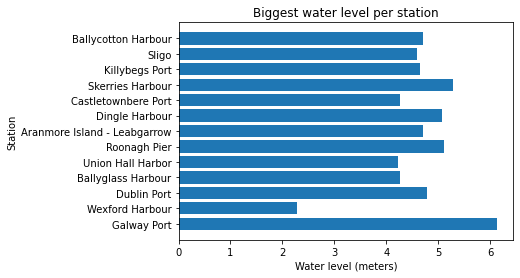

In [23]:
fig, ax = plt.subplots()
ax.barh(station_ids, maxima)
ax.set_xlabel('Water level (meters)')
ax.set_ylabel('Station')
ax.set_title('Biggest water level per station')
plt.show()

In [24]:
max_water_level('Galway Port')

The biggest water level occurs at LAT: 53.269, LONG: -9.048 in Galway Port at 6.143 meters and it occurs in December


(53.269, -9.048, 'December', 6.143, 'Galway Port')

We can see here that the biggest of all waves occurs in Galway Port! But let's see when most of the big waves occur:

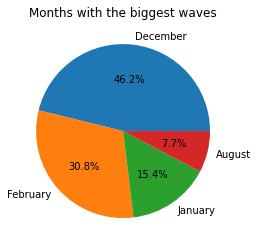

In [25]:
mon = pd.DataFrame(months)
vc = mon.value_counts()
fig, ax = plt.subplots()
ax.pie(vc[0:], labels = mon[0].value_counts().index, autopct='%1.1f%%',)
ax.set_title('Months with the biggest waves')
plt.show()

Now we know that December is the month when the biggest waves happen!

#### Buoys again

First, to get the wave length, we need to calculate it. According to the Ocean Data Labs, the Wave length is L = gT²/2pi, where g=9.8m/s². So, let's calculate it and aggregate to our data:

In [36]:
def wavelength(T):
    g = 9.8
    return g *(T ** 2) / (2*np.pi)

In [37]:
buoys['wavelength'] = buoys['PeakPeriod'].apply(wavelength)

In [38]:
buoys.corr()

,longitude,latitude,PeakPeriod,SignificantWaveHeight,Hmax,SeaTemperature,wavelength
longitude,1.000000,0.514141,-0.518752,-0.403424,-0.399717,0.036289,-0.481078
latitude,0.514141,1.000000,-0.294099,0.102472,0.106403,-0.032596,-0.243233
PeakPeriod,-0.518752,-0.294099,1.000000,0.370907,0.354117,-0.283511,0.968564
SignificantWaveHeight,-0.403424,0.102472,0.370907,1.000000,0.988224,-0.332236,0.407566
Hmax,-0.399717,0.106403,0.354117,0.988224,1.000000,-0.328623,0.386573
SeaTemperature,0.036289,-0.032596,-0.283511,-0.332236,-0.328623,1.000000,-0.284881
wavelength,-0.481078,-0.243233,0.968564,0.407566,0.386573,-0.284881,1.000000


In [39]:
buoys.corr()['wavelength']['SeaTemperature']

-0.28488129948919544

We can see that the wave length has some correlation with the sea temperature, but it's not that strong. Let's see how a simple model like linear regression does.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
LR = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(buoys[['SeaTemperature', 'longitude', 'latitude']], buoys['wavelength'], test_size=0.33, random_state=42)

In [43]:
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [44]:
print(mean_squared_error(y_test, y_pred, squared = False))

88.41031786831465


In [46]:
buoys['wavelength'].describe()

count    45746.000000
mean       162.400514
std        105.814511
min          2.245995
25%         85.641176
50%        155.971844
75%        215.705317
max        974.824026
Name: wavelength, dtype: float64

Although the RMSE score, which measures how far the predictions are from the true value, is a bit high, we can see that it is smaller than the standard deviation of the wave length, so I would say it's a pretty good guess, given the low correlation!